# Auto-immune dataset - Milo differential abundance analysis example

Example workflows for more details:

- [Milopy vignette](https://nbviewer.org/github/emdann/milopy/blob/master/notebooks/milopy_example.ipynb)
- [Extended milo example](https://github.com/Teichlab/scripts/blob/main/conditions/extended_milopy_example.ipynb)

In [1]:
import os,sys
import numpy as np
import pandas as pd
import scanpy as sc

In [74]:
import milopy.core as milo
import milopy

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Load integrated dataset

In [4]:
h5ad_file = '/nfs/team205/bh14/Datasets/Remapped/raw_adata/SCVI_Results/Immune_compartment_PBMC/Subset/Tcell_From_PBMC_Subset.h5ad'
adata = sc.read_h5ad(h5ad_file)

In [7]:
adata

AnnData object with n_obs × n_vars = 123518 × 36601
    obs: 'dataset_id', 'donor_id', 'tissue', 'cell_source', 'disease', 'development_stage', 'age', 'sex', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'barcodes', 'batch', 'n_counts', 'n_genes', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden_1_5'
    var: 'mt', 'rb', 'n_cells_by_counts-0-0-0-0', 'mean_counts-0-0-0-0', 'pct_dropout_by_counts-0-0-0-0', 'total_counts-0-0-0-0', 'n_cells_by_counts-1-0-0-0', 'mean_counts-1-0-0-0', 'pct_dropout_by_counts-1-0-0-0', 'total_counts-1-0-0-0', 'n_cells_by_counts-1-0-0', 'mean_counts-1-0-0', 'pct_dropout_by_counts-1-0-0', 'total_counts-1-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'gene_ids-1', 'feature_types-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'
    uns:

In [6]:
sample_cols = ['dataset_id', 'donor_id', 'tissue', 'disease', 'cell_source']
sample_df = adata.obs[sample_cols].groupby(sample_cols).size().reset_index()
sample_df.columns = sample_cols + ['n_cells']
sample_df = sample_df[sample_df['n_cells'] > 0].copy()
sample_df

,dataset_id,donor_id,tissue,disease,cell_source,n_cells
84,Braga_asthma_CD4,ARMS004,Blood,Healthy,Blood_CD4,195
108,Braga_asthma_CD4,ARMS005,Blood,Healthy,Blood_CD4,210
120,Braga_asthma_CD4,ARMS009,Blood,Asthma,Blood_CD4,91
144,Braga_asthma_CD4,ARMS015,Blood,Asthma,Blood_CD4,107
180,Braga_asthma_CD4,ARMS018,Blood,Healthy,Blood_CD4,96
192,Braga_asthma_CD4,ARMS024,Blood,Asthma,Blood_CD4,67
839,E-MTAB-9492_Penkava_2020,1505_PB_ERS5040437,Blood,psoriatic arthritis,T cell,7957
863,E-MTAB-9492_Penkava_2020,1607_PB_ERS5040438,Blood,psoriatic arthritis,T cell,16192
887,E-MTAB-9492_Penkava_2020,1801_PB_ERS5040439,Blood,psoriatic arthritis,T cell,8626
1858,GSE134809_Martin_et_al_2019,GSM4761137,Blood,Crohn's disease,PBMC,1127


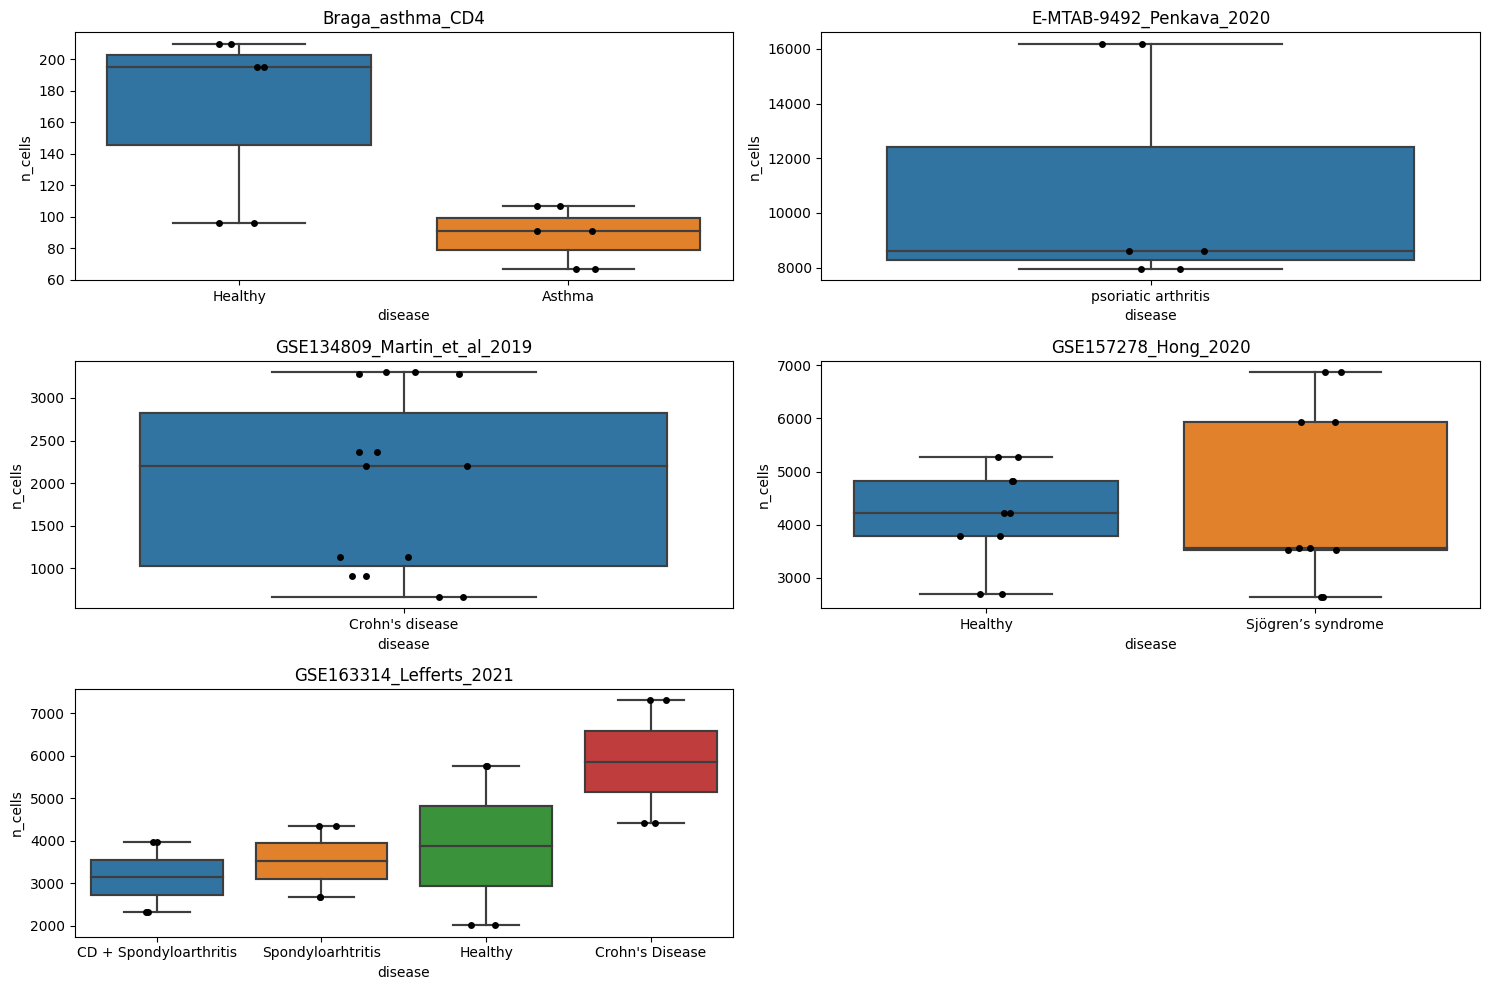

In [42]:
all_datasets = sample_df['dataset_id'].unique()
all_diseases = sample_df['disease'].unique()

with plt.rc_context({'figure.figsize':[15,10]}):
    for i,d in enumerate(all_datasets):
        plt.subplot(3,2,i+1);
        d_df = sample_df[sample_df.dataset_id == d].copy()
        d_df['disease'] = d_df['disease'].astype('str')
        sns.boxplot(
            data = d_df,
            x = 'disease',
            y = 'n_cells'
        );
        sns.stripplot(
            data = d_df,
            x = 'disease',
            y = 'n_cells',
            color = 'black'
        );
        plt.title(d);
    plt.tight_layout()
    plt.show()

Check sample metadata

In [33]:
all_diseases

['Healthy', 'Asthma', 'psoriatic arthritis', 'Crohn's disease', 'Sjögren’s syndrome', 'CD + Spondyloarthritis', 'Spondyloarhtritis', 'Crohn's Disease']
Categories (8, object): ['Asthma', 'CD + Spondyloarthritis', 'Crohn's Disease', 'Crohn's disease', 'Healthy', 'Sjögren’s syndrome', 'Spondyloarhtritis', 'psoriatic arthritis']

In [32]:
## Rename disease (DA code complains because of weird characters in names)
diseases_short = {
    'psoriatic arthritis':'pso_arthritis', 
    "Crohn's disease":"CD", 
    'CD + Spondyloarthritis':"CD_and_spondoarthritis", 
    'Spondyloarhtritis':"spondoarthritis", 
    "Crohn's Disease":"CD", 
    'Healthy':'Healthy', 
    'Sjögren’s syndrome':'Sjogren', 
    'Asthma':'Asthma'
}
# diseases_short = {v:k for k,v in diseases_short.items()}

adata.obs['disease_short'] = [diseases_short[x] for x in adata.obs['disease']]
# sample_col = 'donor_id'
# condition_col = 'disease'


### Make neighbourhoods

In [51]:
## Make KNN graph for Milo analysis 
k = (sample_df['donor_id'].nunique() * 3) # aim to have 3 cells per donor on avg
sc.pp.neighbors(adata, use_rep='X_scVI', n_neighbors = k)

In [12]:
milo.make_nhoods(adata, prop=0.01)

Plot number of cells in neighbourhoods

In [13]:
nhood_size = adata.obsm['nhoods'].toarray().sum(0)
plt.hist(nhood_size, bins=20);
plt.xlabel('# cells in neighbourhood');
plt.ylabel('# neighbouthoods');

### Count cells in neighbourhoods

In [6]:
adata.obs['donor_id'] = adata.obs['donor_id'].astype('str') ## Needed for subsetting
milo.count_nhoods(adata, sample_col = 'donor_id')

In [3]:
# adata.write_h5ad('/nfs/team205/ed6/data/autoimmune_Tcell_From_PBMC_Subset.h5ad')

adata = sc.read_h5ad('/nfs/team205/ed6/data/autoimmune_Tcell_From_PBMC_Subset.h5ad')

sample_cols = ['dataset_id', 'donor_id', 'tissue', 'disease', 'cell_source']
sample_df = adata.obs[sample_cols].groupby(sample_cols).size().reset_index()
sample_df.columns = sample_cols + ['n_cells']
sample_df = sample_df[sample_df['n_cells'] > 0].copy()

## Run differential abundance test

### 1. Use paired case-controls

For each test restrict to case-control in the same disease

In [46]:
def plot_milo_diagnostics(milo_res):
    '''Function to plot diagnostic plots 
    as in extended vignette https://github.com/Teichlab/scripts/blob/main/conditions/extended_milopy_example.ipynb
    '''
    nhood_adata = adata.uns['nhood_adata'].copy()
    alpha = 0.1 ## significance threshold

    with matplotlib.rc_context({'figure.figsize':[8,8]}):

        ## Check P-value histogram
        plt.subplot(2,2,1);
        plt.hist(milo_res['PValue'], bins=20);
        plt.xlabel('Uncorrected P-value');

        ## Visualize extent of multiple-testing correction
        plt.subplot(2,2,2);
        plt.scatter(milo_res['PValue'], milo_res['SpatialFDR'], s=3);
        plt.xlabel('Uncorrected P-value');
        plt.ylabel('SpatialFDR');

        ## Visualize volcano plot
        plt.subplot(2,2,3);
        plt.scatter(milo_res['logFC'], -np.log10(milo_res['SpatialFDR']), s=3);
        plt.axhline(y=-np.log10(alpha), color='red', linewidth=1, label=f'{int(alpha*100)} % SpatialFDR');
        plt.legend();
        plt.xlabel('log-Fold Change');
        plt.ylabel('- log10(SpatialFDR)');
        plt.tight_layout()

        ## Visualize MA plot
        df = milo_res
        emp_null = df[df['SpatialFDR'] >= alpha]['logFC'].mean()
        df['Sig'] = df['SpatialFDR'] < alpha

        plt.subplot(2,2,4);
        sns.scatterplot(data=df, x="logCPM", y="logFC", hue='Sig')
        plt.axhline(y=0, color='grey', linewidth=1)
        plt.axhline(y=emp_null, color='purple', linewidth=1);
        plt.legend(title=f'< {int(alpha*100)} % SpatialFDR')
        plt.xlabel('Mean log-counts');
        plt.ylabel('log-Fold Change');
        plt.show()
        
def run_DA_autoimmune(adata, sample_df, DA_test_dict):
    '''Wrapper function to run differential abundance testing on autoimmune dataset
    '''
    
    adata.obs['disease_test'] = np.where(adata.obs['disease'].isin(DA_test_dict['disease']), 1, 0)
    test_samples = sample_df['donor_id'][sample_df['dataset_id'] == DA_test_dict['dataset_id']].astype('str').values
    milo.DA_nhoods(adata, 
                   design="~disease_test",
                   subset_samples=test_samples.tolist()
                  )
    milo_results = adata.uns["nhood_adata"].obs.copy() ## Store results for each disease
    plot_milo_diagnostics(milo_results.dropna())
    return(milo_results)


braga_asthma


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/nfs/team205/ed6/bin/milopy/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)
/tmp/ipykernel_2106/945196252.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sig'] = df['SpatialFDR'] < alpha


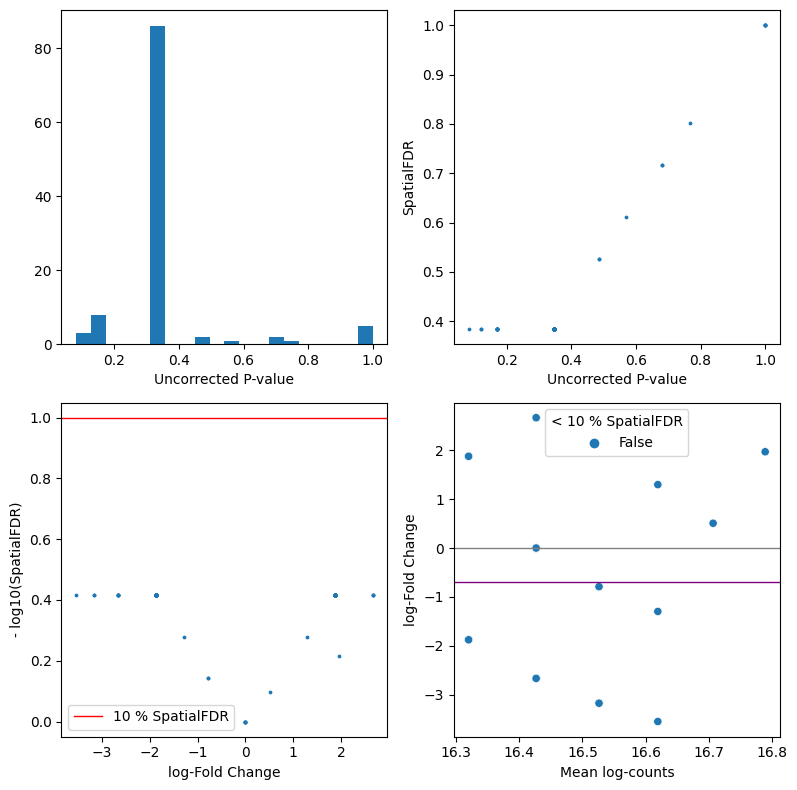

hong_sjogren


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/nfs/team205/ed6/bin/milopy/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)
/tmp/ipykernel_2106/945196252.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sig'] = df['SpatialFDR'] < alpha


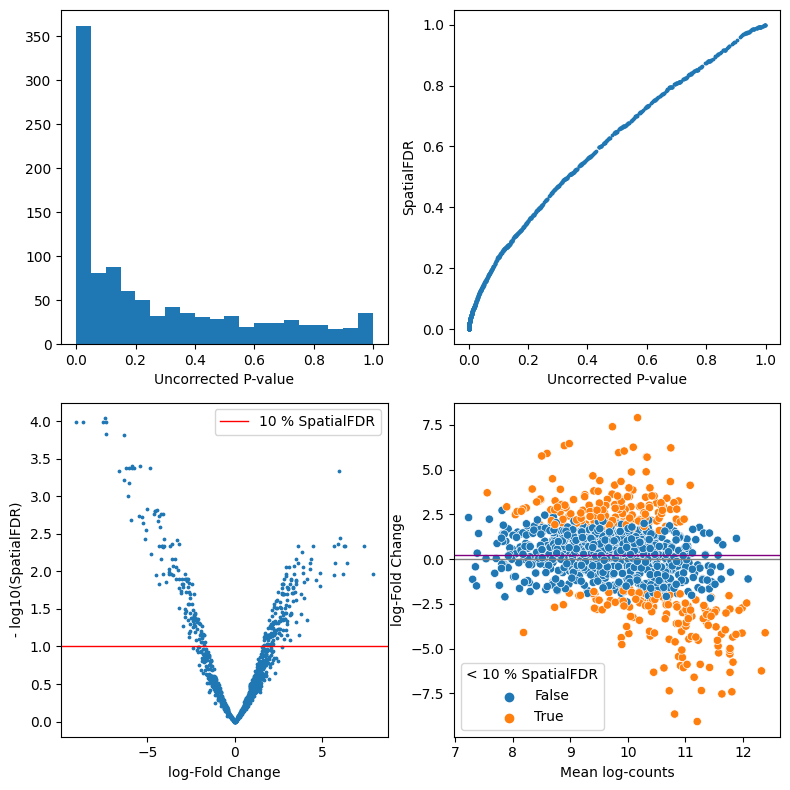

lefferts_spondy


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/nfs/team205/ed6/bin/milopy/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)


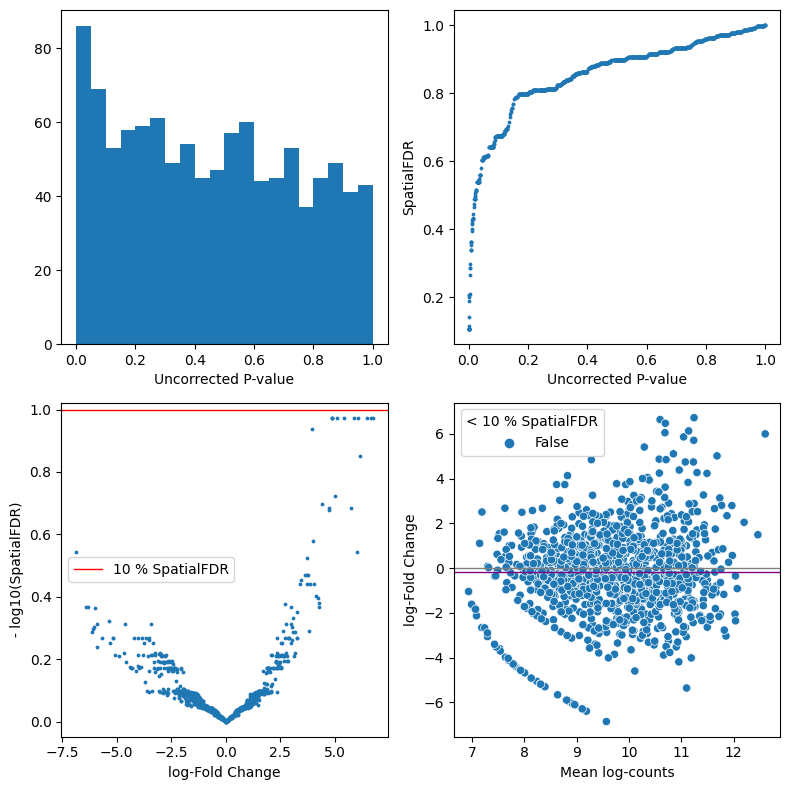

lefferts_cd


/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/nfs/team205/ed6/bin/milopy/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)


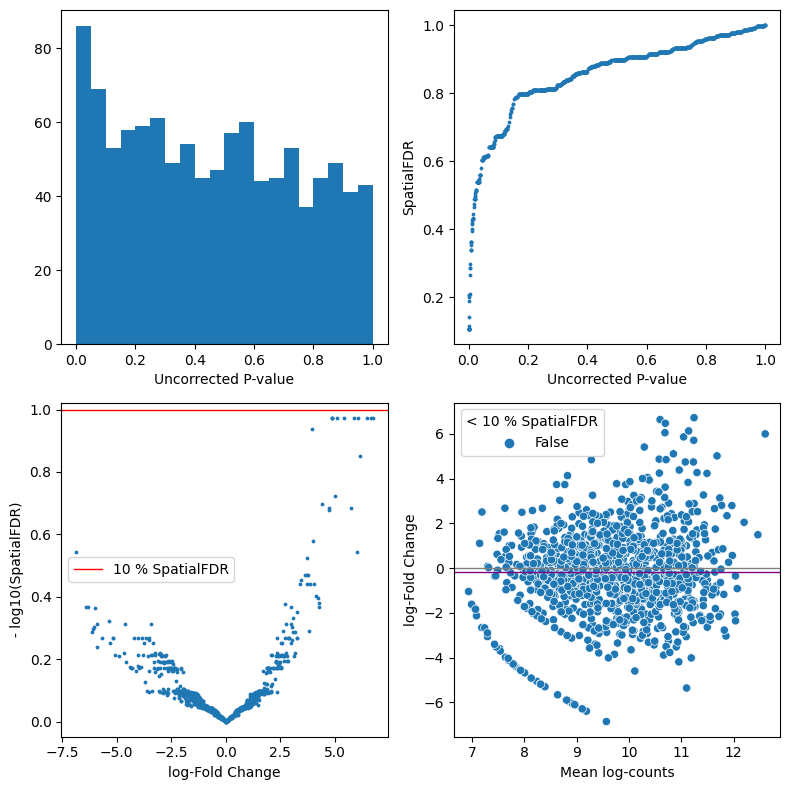

In [48]:
DA_test_dict = {
    ## Define parameters for each test
    'braga_asthma':{'dataset_id':'Braga_asthma_CD4', 'disease':['Asthma']},
    'hong_sjogren':{'dataset_id':'GSE157278_Hong_2020', 'disease':['Sjögren’s syndrome']},
    'lefferts_spondy':{'dataset_id':'GSE163314_Lefferts_2021', 'disease':['CD + Spondyloarthritis', 'Spondyloarthritis']},
    'lefferts_cd':{'dataset_id':'GSE163314_Lefferts_2021', 'disease':['CD + Spondyloarthritis', "Crohn's disease"]}
}

DA_test_res = {}
for k in DA_test_dict.keys():
    print(k)
    DA_test_res[k] = run_DA_autoimmune(adata, sample_df, DA_test_dict=DA_test_dict[k])

Comments:

- Except for the Hong dataset, in all other cases there seems to be too little replicates per condition to detect significant differential abundance in this dataset

### 2. Use all healthy as controls

Tricky because we can't control for the batch effect between datasets (for some conditions we don't have data from all the datasets)

In [51]:
diseases_short

{'psoriatic arthritis': 'pso_arthritis',
 "Crohn's disease": 'CD',
 'CD + Spondyloarthritis': 'CD_and_spondoarthritis',
 'Spondyloarhtritis': 'spondoarthritis',
 "Crohn's Disease": 'CD',
 'Healthy': 'Healthy',
 'Sjögren’s syndrome': 'Sjogren',
 'Asthma': 'Asthma'}

In [52]:

milo.DA_nhoods(adata, 
               design="~disease_short",
               model_contrasts='disease_shortAsthma-disease_shortHealthy'
              )

DA_test_res['all_asthma'] = adata.uns['nhood_adata'].obs.copy()

milo.DA_nhoods(adata, 
               design="~disease_short",
               model_contrasts='disease_shortpso_arthritis-disease_shortHealthy'
              )
DA_test_res['all_pso_arthritis'] = adata.uns['nhood_adata'].obs.copy()

milo.DA_nhoods(adata, 
               design="~disease_short",
               model_contrasts='disease_shortCD-disease_shortHealthy'
              )
DA_test_res['all_CD'] = adata.uns['nhood_adata'].obs.copy()

milo.DA_nhoods(adata, 
               design="~disease_short",
               model_contrasts='disease_shortSjogren-disease_shortHealthy'
              )
DA_test_res['all_Sjogren'] = adata.uns['nhood_adata'].obs.copy()

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/nfs/team205/ed6/bin/milopy/milopy/core.py:285: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  nhood_adata.obs = pd.concat([nhood_adata.obs, res], 1)
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.

all_asthma


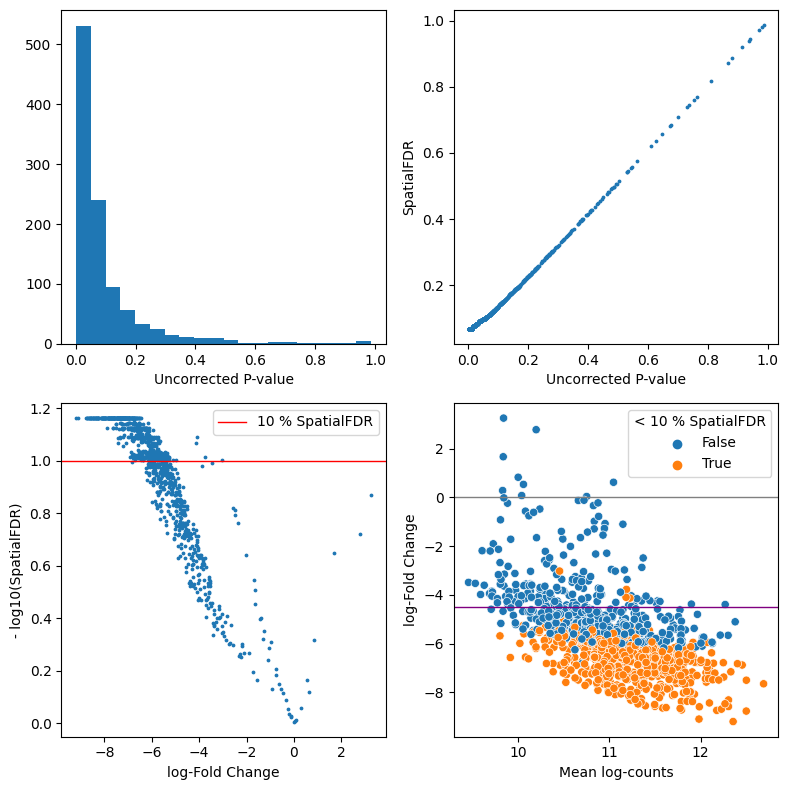

all_pso_arthritis


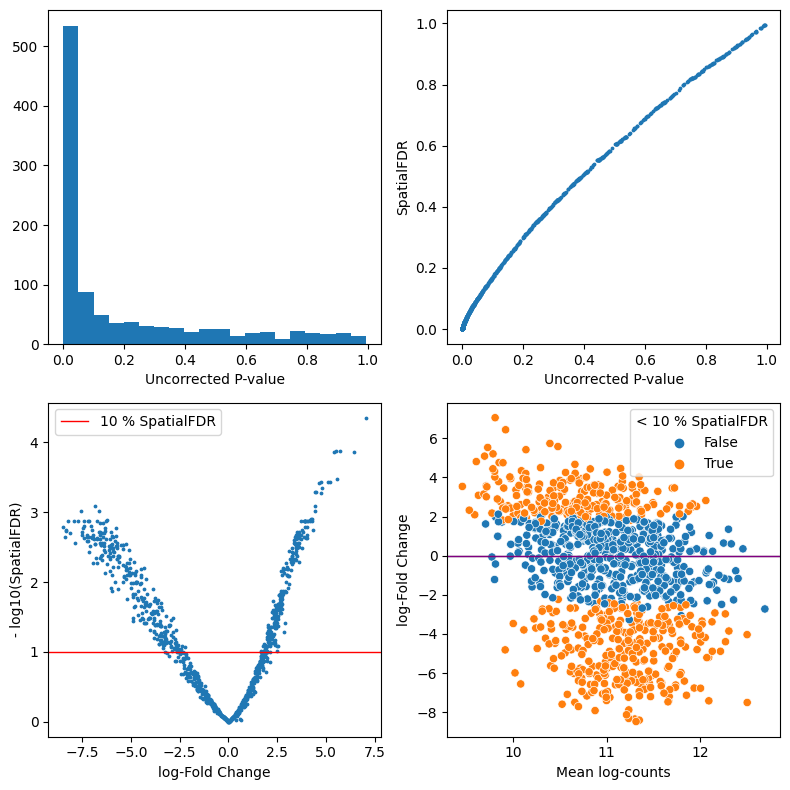

all_CD


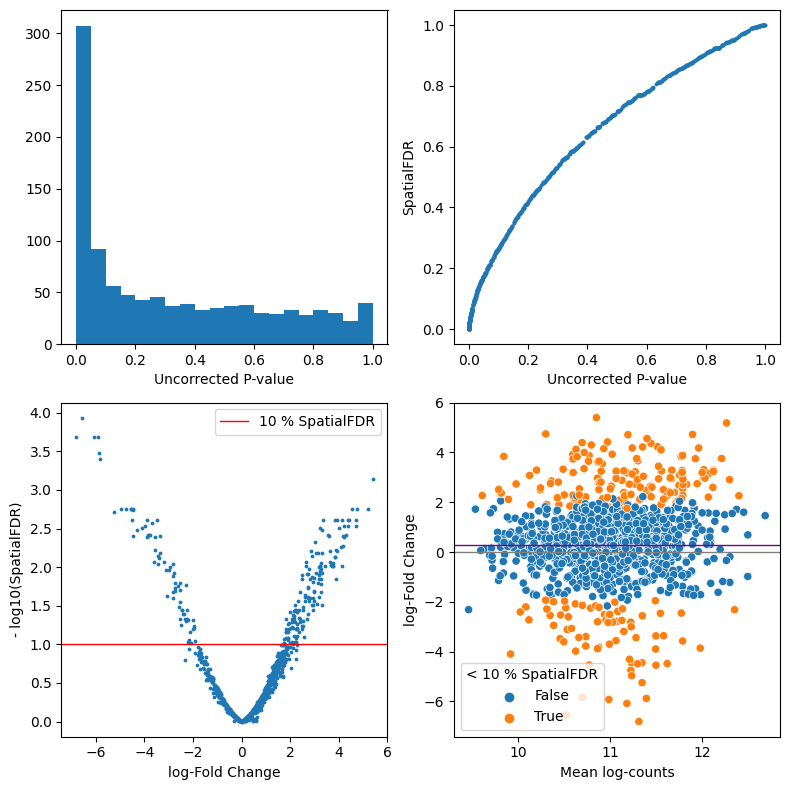

all_Sjogren


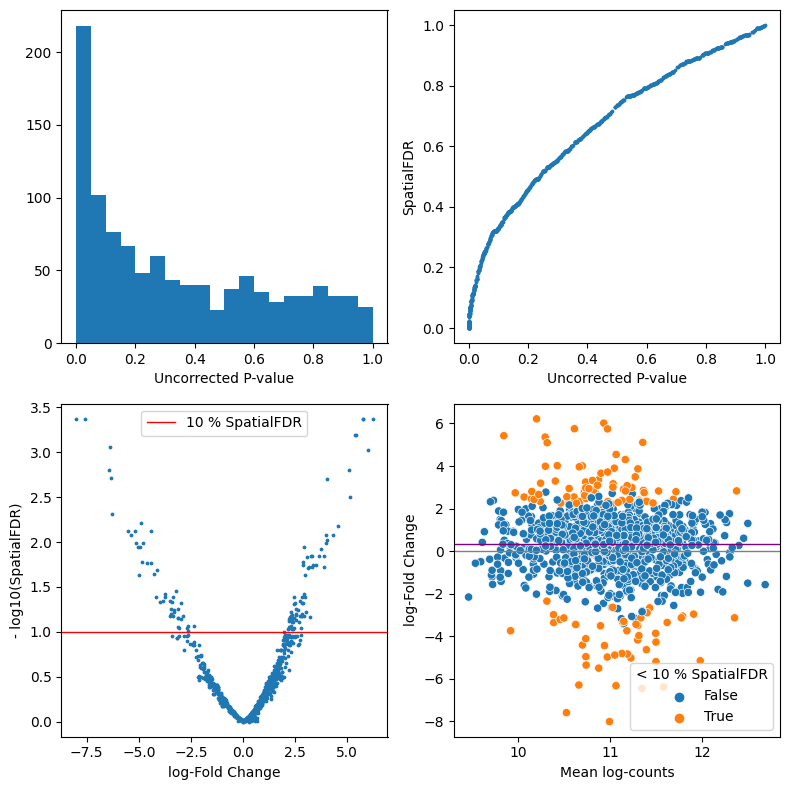

In [53]:
for k in DA_test_res.keys():
    if k.startswith("all_"):
        print(k)
        plot_milo_diagnostics(DA_test_res[k])

Comments:

- In `all_asthma` we see skewed distribution of depleted neighbourhoods (i.e. enriched in Healthy), likely because of the imbalance in number of Healhty and disease donors
- All the others look reasonable in terms of diagnostic statistics, although we might have false positives from batch effects 

#### Compare Sjogren results with different control 

Let's compare the results with matched controls and results using all healhty samples

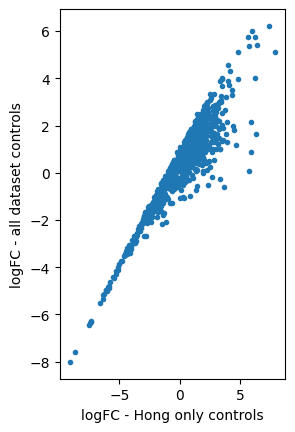

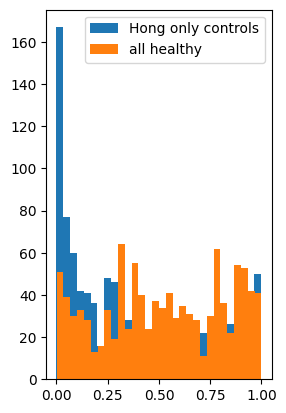

In [68]:
plt.subplot(1,2,1);
plt.plot(DA_test_res['hong_sjogren']['logFC'], DA_test_res['all_Sjogren']['logFC'], '.');
plt.xlabel('logFC - Hong only controls');
plt.ylabel('logFC - all dataset controls');
plt.show()

plt.subplot(1,2,2);
plt.hist(DA_test_res['hong_sjogren']['SpatialFDR'], bins=30, label = 'Hong only controls');
plt.hist(DA_test_res['all_Sjogren']['SpatialFDR'], bins=30, label='all healthy');
plt.legend();
plt.show()

Comments:
- Looks like there are a lot more significant results using the matched controls!

## Visualize results by cell type

We select the DA tests where the diagnostic plots look reasonable.

In [71]:
keep_tests = ['hong_sjogren', 'all_pso_arthritis', 'all_CD']

Visualize DA logFC on gene expression UMAP

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


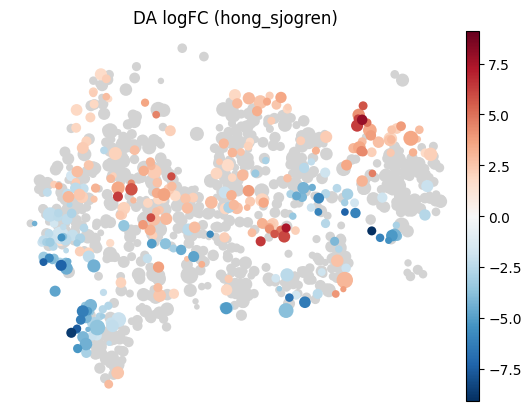

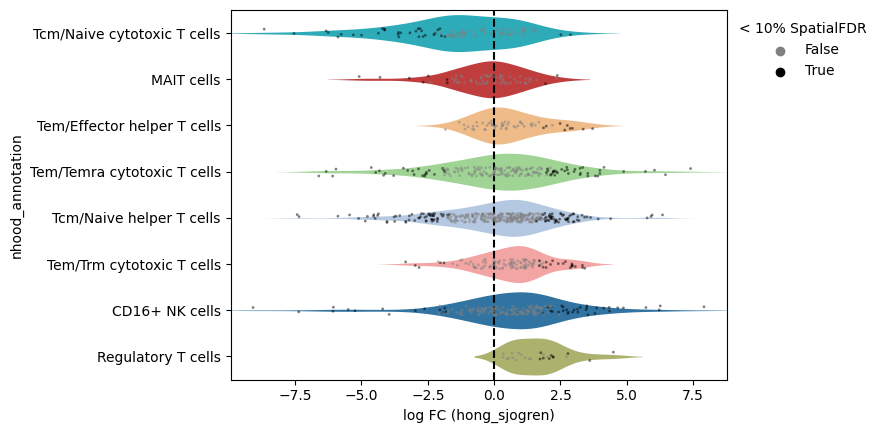

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


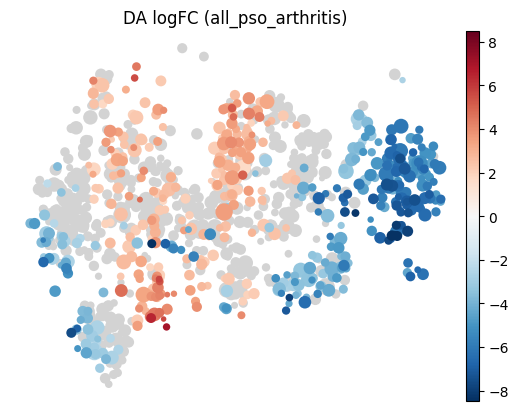

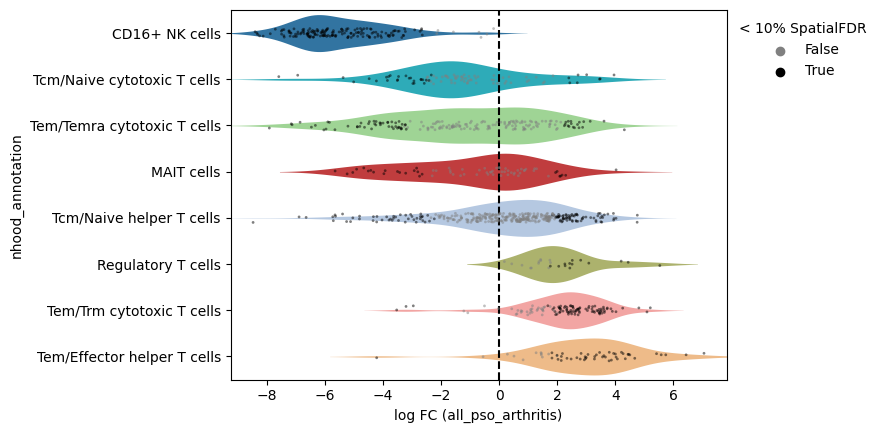

/home/jovyan/my-conda-envs/oor-benchmark/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


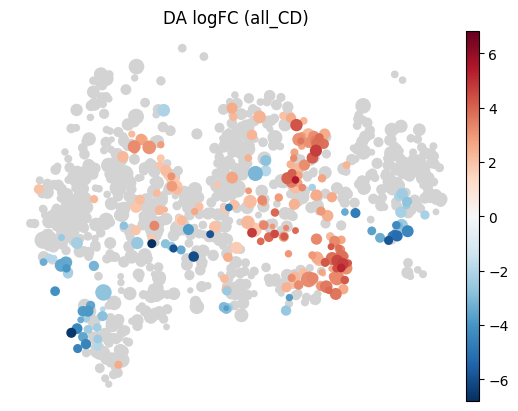

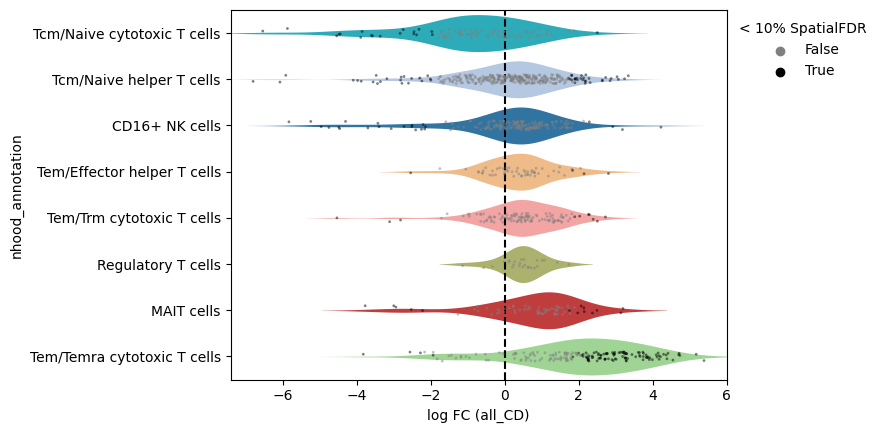

In [91]:
for k in keep_tests:
    adata.uns['nhood_adata'].obs = DA_test_res[k].copy()

    ## Plot neighbourhoods on embedding
    milopy.utils.build_nhood_graph(adata)
    milopy.plot.plot_nhood_graph(adata, alpha=0.1, min_size=0.5, title=f'DA logFC ({k})');

    ## Plot by cell type
    milopy.utils.annotate_nhoods(adata, anno_col='majority_voting')
    milopy.plot.plot_DA_beeswarm(adata, alpha=0.1);
    plt.xlabel(f'log FC ({k})');
    plt.show()

In [108]:
pd.DataFrame(DA_test_res['all_CD'][res_cols].values, columns=[f'{c}_all_CD'for c in res_cols])

,logFC_all_CD,SpatialFDR_all_CD
0,-1.052000,0.396014
1,-0.579215,0.747077
2,-0.133583,0.950617
3,1.818061,0.107115
4,-0.003983,0.998892
...,...,...
1050,-1.971256,0.057350
1051,-1.316064,0.368876
1052,-3.184517,0.008521
1053,-3.439929,0.007187


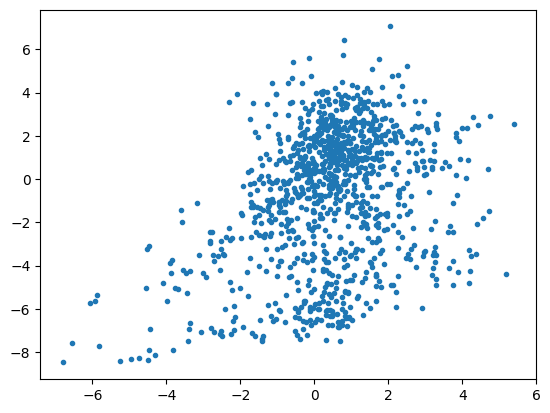

In [109]:
res_cols = ['logFC', 'SpatialFDR']
compare_disease_df = pd.concat([
    pd.DataFrame(DA_test_res['all_CD'][res_cols].values, columns=[f'{c}_all_CD'for c in res_cols]),
    pd.DataFrame(DA_test_res['all_pso_arthritis'][res_cols].values, columns=[f'{c}_all_pso_arthritis'for c in res_cols])],
    axis=1
)

plt.plot(DA_test_res['all_CD']['logFC'], DA_test_res['all_pso_arthritis']['logFC'], '.');
plt.show()

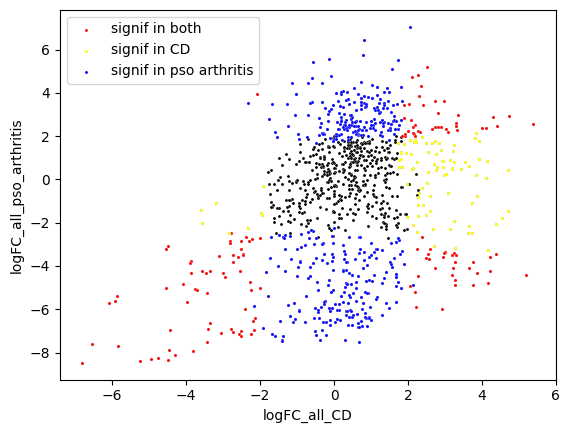

In [126]:
alpha = 0.1 ## FDR threshold
sns.scatterplot(data = compare_disease_df, x='logFC_all_CD', y='logFC_all_pso_arthritis', color='black', s=5);
sns.scatterplot(data = compare_disease_df[(compare_disease_df['SpatialFDR_all_CD'] <= alpha) & (compare_disease_df['SpatialFDR_all_pso_arthritis'] <= alpha)], 
                x='logFC_all_CD', y='logFC_all_pso_arthritis', label='signif in both', color='red', s=5);
sns.scatterplot(data = compare_disease_df[(compare_disease_df['SpatialFDR_all_CD'] <= alpha) & (compare_disease_df['SpatialFDR_all_pso_arthritis'] > alpha)], 
                x='logFC_all_CD', y='logFC_all_pso_arthritis', label='signif in CD', color='yellow', s=5);
sns.scatterplot(data = compare_disease_df[(compare_disease_df['SpatialFDR_all_CD'] > alpha) & (compare_disease_df['SpatialFDR_all_pso_arthritis'] <= alpha)], 
                x='logFC_all_CD', y='logFC_all_pso_arthritis', label='signif in pso arthritis', color='blue', s=5);
plt.show()